In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder

In [4]:

df = pd.read_csv(r"fridge_inventory.csv")

In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    44 non-null     object
 1   Time    44 non-null     object
 2   Item    44 non-null     object
 3   Action  44 non-null     object
dtypes: object(4)
memory usage: 1.5+ KB


In [6]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [7]:
Le = LabelEncoder()
Le.fit(df['Action'])
Actions= Le.transform(df['Action'])
Le.fit(df['Item'])
Items = Le.transform(df['Item'])

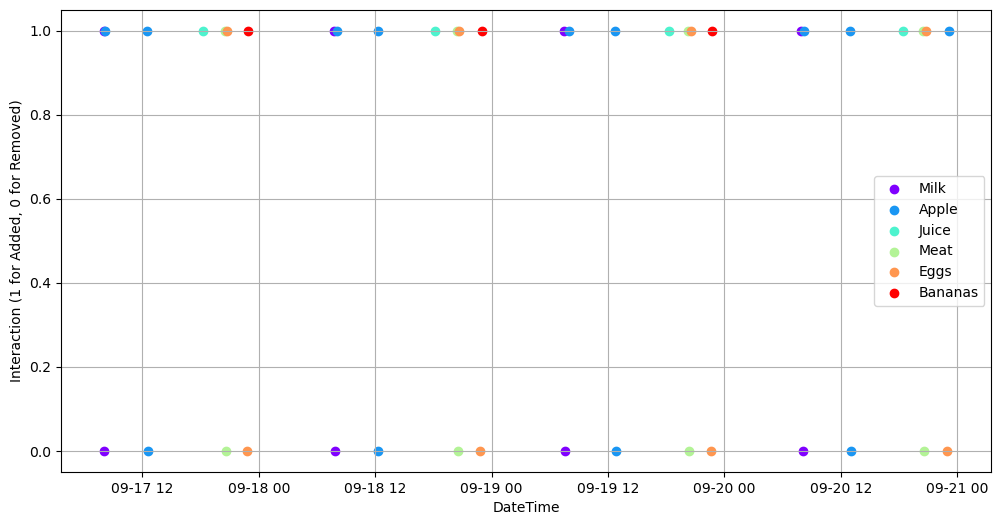

In [8]:
unique_items = df["Item"].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_items)))

# Create a scatter plot
plt.figure(figsize=(12, 6))
for i, item in enumerate(unique_items):
    item_df = df[df["Item"] == item]
    y_values = [1 if action == "Added" else 0 for action in item_df["Action"]]
    x_values = pd.to_datetime(item_df["DateTime"])
    plt.scatter(x_values, y_values, label=item, color=colors[i])

# Set labels and legend
plt.xlabel("DateTime")
plt.ylabel("Interaction (1 for Added, 0 for Removed)")
plt.legend(loc="best")

# Show the scatter plot
plt.grid()
plt.show()

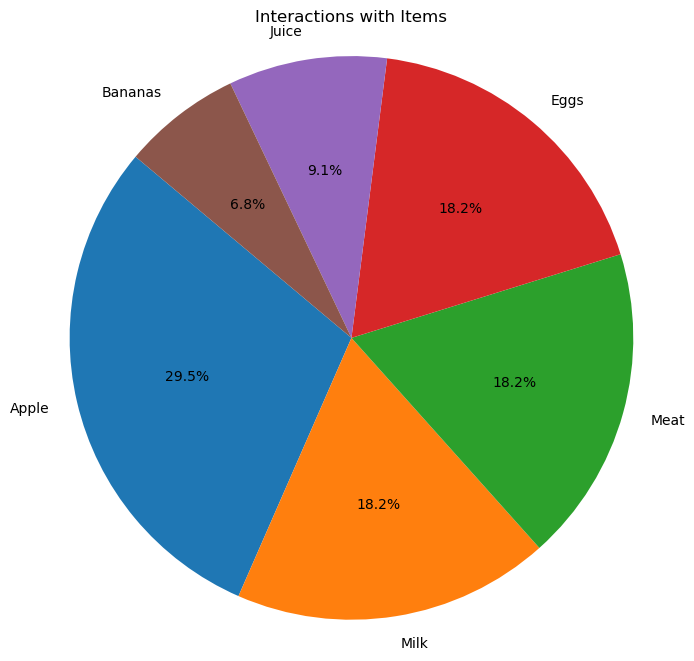

In [9]:
interaction_counts = df["Item"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(interaction_counts.values, labels=interaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Interactions with Items")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

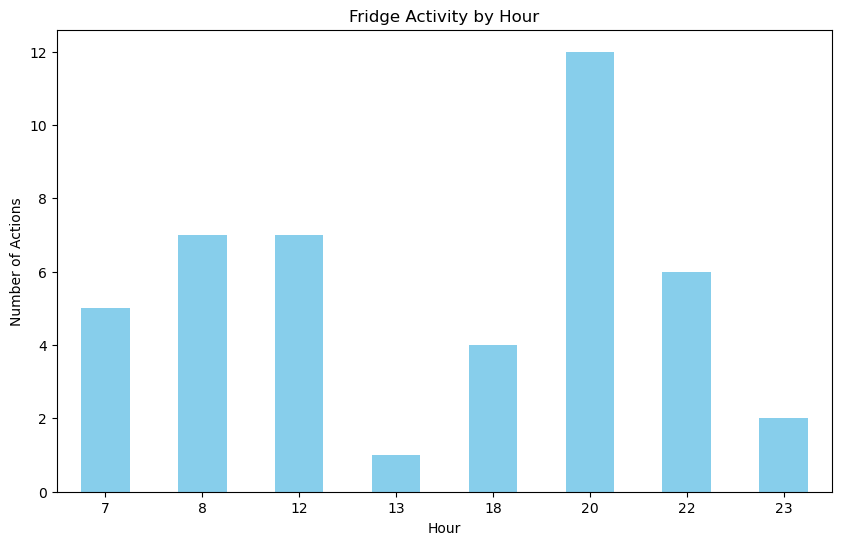

In [10]:
df["Hour"] = df["DateTime"].dt.hour

# Group by hour and count the number of actions (additions/removals)
hourly_activity = df.groupby("Hour")["Action"].count()

# Create a bar chart
plt.figure(figsize=(10, 6))
hourly_activity.plot(kind="bar", color="skyblue")
plt.title("Fridge Activity by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Actions")
plt.xticks(rotation=0)

# Show the chart
plt.show()

<Figure size 1200x600 with 0 Axes>

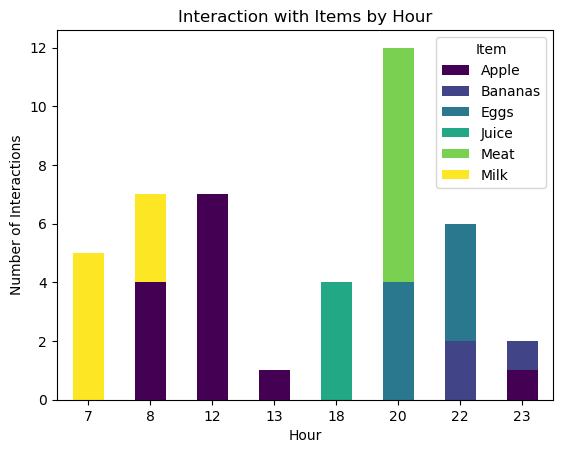

In [13]:
pivot_df = df.pivot_table(index="Hour", columns="Item", values="Action", aggfunc="count", fill_value=0)

# Create a multi-bar chart
plt.figure(figsize=(12, 6))
pivot_df.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Interaction with Items by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=0)
plt.legend(title="Item")

# Show the chart
plt.show()